<img src = "images/Logo.png" width = 220, align = "left">

<h1 align=center><font size = 6>Nonlinear transformations</font></h1>
<h2 align=center><font size = 5>Lab Exercise 3.5</font></h2>
<h3 align=center><font size = 4><b>Advanced Machine Learning<br></b><small>From Theory to Practice with NumPy and scikit-learn<br><i>Volume 1: Generalized Linear Models</i></font></h3>

## Introduction

In this lab execise we will explore different non-linear transformations as data preprocessing techniques applied to numerical variables. 

When it comes to logarithmic transformation of the data we make distinction between three cases:
- Only the dependent/response variable is log-transformed
- Only independent/predictor variable(s) is log-transformed
- Both dependent/response variable and independent/predictor variable(s) are log-transformed

The first case was already covered in lab exercise Ch2. Ex.8. when we checked the Moore's law.<br>
For the second case we will use a small dataset containing the proportion of recalled word at various time.<br>
For the third case the log transformation will applied on both the input and output variables of *Mammal species* dataset with response variable as the *Brain weight* (in gramm), and *Body weight* (in kilograms), *Gestation period length* (in days), and *Litter size* as predictors.<br>
*The 'Word recall' dataset can be found at https://online.stat.psu.edu/stat462/sites/onlinecourses.science.psu.edu.stat462/files/data/wordrecall/index.txt*
*The 'Mammal species' dataset can be found at https://CRAN.R-project.org/package=asbio.*

### Table of contents
1. [Logarithmic transformations](#LogTransf)
2. [Variance stabilizing transformations](#VarStabTransf)
3. [Power transformations](#PowerTransf)
4. [Normalizing the data](#DataNormalization)

## 1. Logarithmic transformations <a name="LogTransf"></a>

Let's import the required libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.linalg import inv, norm
from sklearn.linear_model import LinearRegression
import os
%matplotlib inline

### Log transformation of the response variable

Such an example was already presented in lab exercise Ch2. Ex. 8. when we checked the validity of the Moore's law with the data from Wikipedia.

### Log transformation of the predictor variable

For this we use the Word recall dataset. Read the dataset in pandas dataframe.

In [2]:
dataWR = pd.read_csv(os.path.join('data','WordRecall.csv'),sep='\t')
dataWR

,time,prop
0,1,0.84
1,5,0.71
2,15,0.61
3,30,0.56
4,60,0.54
5,120,0.47
6,240,0.45
7,480,0.38
8,720,0.36
9,1440,0.26


Make a scatter plot together with the estimated regression line.

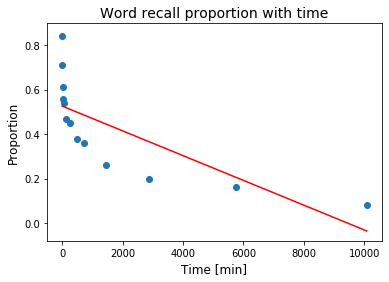

In [3]:
plt.scatter(dataWR['time'],dataWR['prop'])
plt.title('Word recall proportion with time',fontsize=14)
plt.xlabel('Time [min]',fontsize=12)
plt.ylabel('Proportion',fontsize=12)
lr=LinearRegression()
lr.fit(np.array(dataWR['time']).reshape(-1,1),dataWR['prop'])
ymin,ymax=lr.intercept_+lr.coef_[0]*dataWR['time'].min(),\
lr.intercept_+lr.coef_[0]*dataWR['time'].max()
plt.plot([dataWR['time'].min(),dataWR['time'].max()],[ymin,ymax],'r-')
plt.show()

We may use the *statsmodels* library to summarize the OLS results.

In [4]:
from statsmodels.formula.api import ols
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ['F statistic', 'p-value']
resultsWR = ols(formula = 'prop ~ time', data=dataWR).fit()
print(resultsWR.summary(title='OLS Results for original "Word recall" dataset'))
test = sms.het_goldfeldquandt(resultsWR.resid, resultsWR.model.exog)
print("\nGoldfeld-Quandt test:\n",lzip(name, test))
print("RMSE =",np.sqrt(resultsWR.mse_resid))

                OLS Results for original "Word recall" dataset                
Dep. Variable:                   prop   R-squared:                       0.571
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     14.63
Date:                Sun, 26 Apr 2020   Prob (F-statistic):            0.00282
Time:                        21:38:37   Log-Likelihood:                 7.1057
No. Observations:                  13   AIC:                            -10.21
Df Residuals:                      11   BIC:                            -9.082
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5259      0.049     10.774      0.0

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  "anyway, n=%i" % int(n))


Altough the Goldfeld-Quandt test does not reject the null hypothesis of constant variance, looking at the scatter plot of the residuals below it is clear that the linear regression is not a good fit, as the variance of the residuals is not constant.

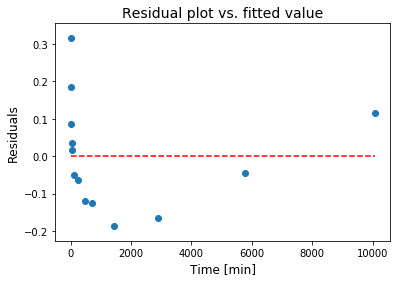

In [5]:
plt.scatter(dataWR['time'],resultsWR.resid)
plt.plot([dataWR['time'].min(),dataWR['time'].max()],[0,0],'r--')
plt.title("Residual plot vs. fitted value",fontsize=14)
plt.xlabel("Time [min]",fontsize=12)
plt.ylabel("Residuals",fontsize=12)
plt.show()

Let's create a new variable which is the natural logarithm of the time, and call this new input variable as 'log_time'.

In [6]:
dataLogWR=dataWR
dataLogWR['log_time']=dataLogWR.drop(columns='prop').apply(np.log,axis=0)
dataLogWR

,time,prop,log_time
0,1,0.84,0.000000
1,5,0.71,1.609438
2,15,0.61,2.708050
3,30,0.56,3.401197
4,60,0.54,4.094345
5,120,0.47,4.787492
6,240,0.45,5.480639
7,480,0.38,6.173786
8,720,0.36,6.579251
9,1440,0.26,7.272398


Make a new scatter plot, but at this time use the newly created predictor.

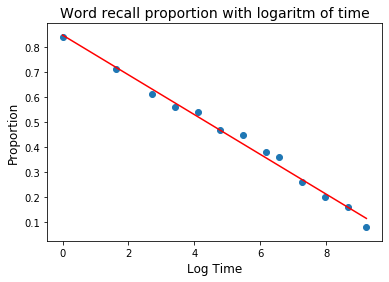

In [7]:
plt.scatter(dataLogWR['log_time'],dataLogWR['prop'])
plt.title('Word recall proportion with logaritm of time',fontsize=14)
plt.xlabel('Log Time',fontsize=12)
plt.ylabel('Proportion',fontsize=12)
lr.fit(np.array(dataLogWR['log_time']).reshape(-1,1),dataLogWR['prop'])
ymin,ymax=lr.intercept_+lr.coef_[0]*dataLogWR['log_time'].min(),\
lr.intercept_+lr.coef_[0]*dataLogWR['log_time'].max()
plt.plot([dataLogWR['log_time'].min(),dataLogWR['log_time'].max()],[ymin,ymax],'r-')
plt.show()

From the scatter plot above it is clear that now we have a much better fit of the linear regresson.

let's print out the summary of the new OLS results.

In [8]:
resultsLogWR = ols(formula = 'prop ~ log_time', data=dataLogWR).fit()
print(resultsLogWR.summary(title='OLS Results for log-transformed "Word recall" dataset'))
test = sms.het_goldfeldquandt(resultsLogWR.resid, resultsLogWR.model.exog)
print("\nGoldfeld-Quandt test:\n",lzip(name, test))
print("RMSE =",np.sqrt(resultsLogWR.mse_resid))

            OLS Results for log-transformed "Word recall" dataset             
Dep. Variable:                   prop   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     1076.
Date:                Sun, 26 Apr 2020   Prob (F-statistic):           2.53e-12
Time:                        21:38:38   Log-Likelihood:                 31.462
No. Observations:                  13   AIC:                            -58.92
Df Residuals:                      11   BIC:                            -57.79
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8464      0.014     59.628      0.0

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  "anyway, n=%i" % int(n))


As can be seen the R-squared value increased from 0.57 to 0.99, while the RMSE decreased from 0.152 to 0.023. 

Let's make the residual plot.

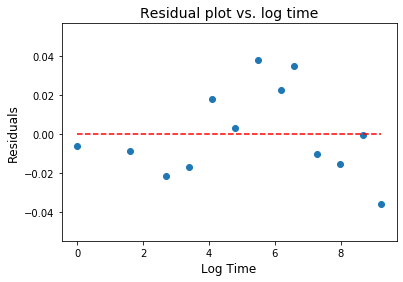

In [9]:
plt.scatter(dataLogWR['log_time'],resultsLogWR.resid)
plt.plot([dataLogWR['log_time'].min(),dataLogWR['log_time'].max()],[0,0],'r--')
plt.title("Residual plot vs. log time",fontsize=14)
plt.xlabel("Log Time",fontsize=12)
plt.ylabel("Residuals",fontsize=12)
plt.show()

We can conclude that by taking the logarithm of the predictor, the linear regression model is a good fit on the data.

### Log transformation of both the response and predictors

As a first step, we read the *Asbio_data_case0902* file into a pandas dataframe.

In [10]:
data = pd.read_csv(os.path.join('data','Asbio_data_case0902.csv'))
data

,Xs,Y,Xb,Xg,Xl
0,Quokka,17.50,3.500,26,1.0
1,Hedgehog,3.50,0.930,34,4.6
2,Tree shrew,3.15,0.150,46,3.0
3,Elephant shrew I,1.14,0.049,51,1.5
4,Elephant shrew II,1.37,0.064,46,1.5
5,Lemur,22.00,2.100,135,1.0
6,Slow loris,12.80,1.200,90,1.2
7,Bush baby,9.90,0.700,135,1.0
8,Howler monkey,54.00,7.700,139,1.0
9,Ring-tail monkey,73.00,3.700,180,1.0


A data frame with 96 observations on the following 5 variables:
- Xs - A factor defining common names for mammal species under examination;
- Y - Brain weight (in grams);
- Xb - Body weight (in kilograms);
- Xg - Gestation period length (in days);
- Xl - Litter size.


#### Fitting regression model without any pre-processing

We may create a scatter plot matrix to have a visual inspection of our data. 

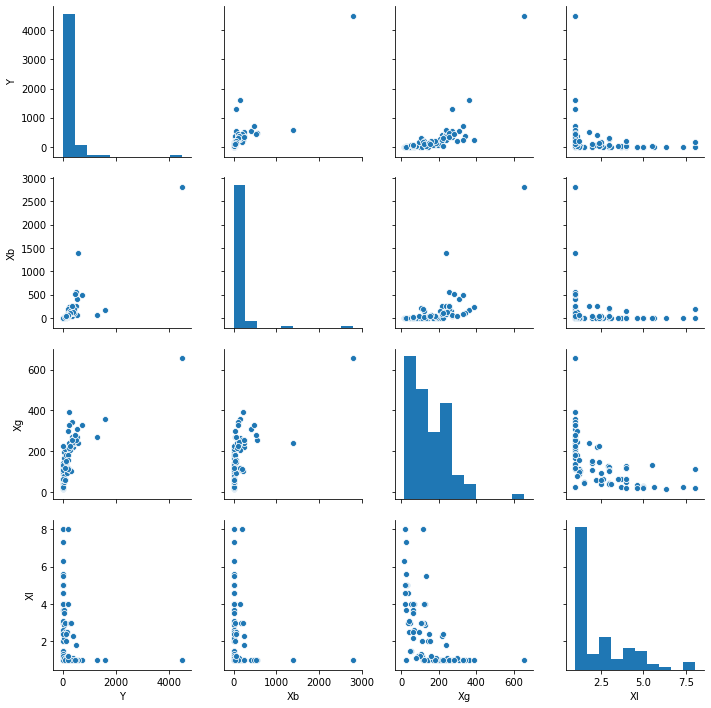

In [11]:
import seaborn as sns
sns.pairplot(data)
plt.show()

Looking at the first row, which gives some hint on the correlation among the response and each of the predictors, we may suspect the presence of some outliers. 

Let's fit the simple linear regression using each predictor individually.

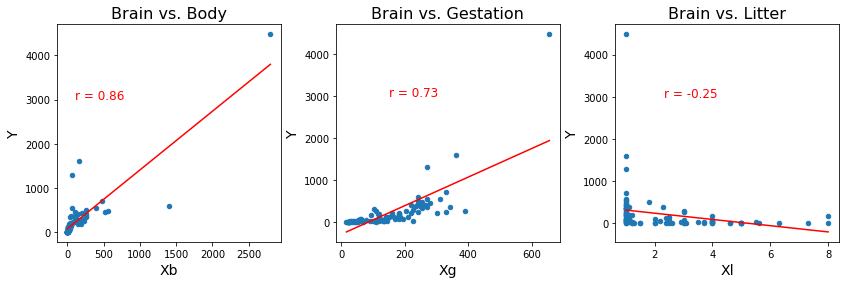

In [12]:
X=np.array(data[["Xb","Xg","Xl"]])
N,D=X.shape
Xdot=(np.insert(X,0,np.ones(N),axis=1))
y_=np.array(data['Y'])[:,np.newaxis]
fig, ax = plt.subplots(1, 3, figsize=(14, 4))
plt.subplots_adjust(wspace = 0.25)
xvarlist=['Body','Gestation','Litter']
linregr=LinearRegression()
for i in range(D):
    ax[i].scatter(X[:,i],y_,s=20)
    x_=X[:,i].reshape(-1,1)
    linregr.fit(x_,y_)
    ax[i].plot([x_.min(),x_.max()],linregr.predict(np.array([[x_.min()],[x_.max()]])),c='r')
    ax[i].set_xlabel(list(data.columns.values)[i+2],fontsize=14)
    ax[i].set_ylabel(list(data.columns.values)[1],fontsize=14)
    ax[i].set_title('Brain vs. '+xvarlist[i],fontsize=16)
    ax[i].annotate('r = '+'%.2f'%np.corrcoef(np.append(X,y_,axis=1), rowvar=False)[:,-1][i],\
                   xy=(X.mean(axis=0)[i],3000),color='red',fontsize=12)
plt.show()

From the above plots, we can observe that both *Y* vs. *Xb* and *Y* vs. *Xg* have an outlier in both x and y direction, thus, they might represent a potential influential point.

Let's create the histogram for each input/output variable.

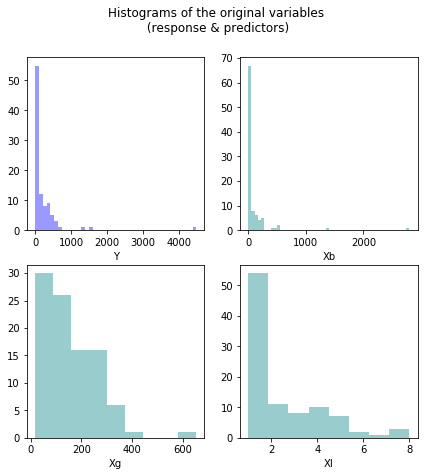

In [13]:
import seaborn as sns
fig, axes = plt.subplots(2, 2, figsize=(7, 7))
sns.distplot(data["Y"] , color="blue", ax=axes[0, 0],kde=False)
sns.distplot(data["Xb"] , color="teal", ax=axes[0, 1],kde=False)
sns.distplot(data["Xg"] , color="teal", ax=axes[1, 0],kde=False)
sns.distplot(data["Xl"] , color="teal", ax=axes[1, 1],kde=False)
fig.suptitle("Histograms of the original variables\n (response & predictors)")
plt.show()

From the above histograms, we may observe that both input and output variables are skewed to the left (positive skewness).

Now, let's fit the multiple linear regression model using *statsmodels* library.

In [14]:
from statsmodels.formula.api import ols
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ['F statistic', 'p-value']
results = ols(formula = 'Y ~ Xb + Xg + Xl', data=data).fit()
print(results.summary(title='OLS Results for original "Mammal species" dataset'))
test = sms.het_goldfeldquandt(results.resid, results.model.exog)
print("\nGoldfeld-Quandt test:\n",lzip(name, test))
print("RMSE =",np.sqrt(results.mse_resid))

              OLS Results for original "Mammal species" dataset               
Dep. Variable:                      Y   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     130.7
Date:                Sun, 26 Apr 2020   Prob (F-statistic):           4.64e-33
Time:                        21:38:43   Log-Likelihood:                -653.93
No. Observations:                  96   AIC:                             1316.
Df Residuals:                      92   BIC:                             1326.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -225.2921     83.059     -2.712      0.0

The adjusted R-squared value is quite high, 80% of the mammal's brain variation is explained by the body weight, gestation period, and litter size. 

However, the condition number is high, which might indicate the presence of collinearity. So let's check the variance inflation factors.

In [15]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
print("VIF for Xb =",variance_inflation_factor(Xdot,1))
print("VIF for Xg =",variance_inflation_factor(Xdot,2))
print("VIF for Xl =",variance_inflation_factor(Xdot,3))

VIF for Xb = 1.8171683709147999
VIF for Xg = 2.7640155723936335
VIF for Xl = 1.7436732451578507


VIF values are well below 10, and even below 5, so there is no severe collinearity issue.

We may check the Pearson correlation coefficient among the variables.

In [16]:
data[["Y","Xb","Xg","Xl"]].corr()

,Y,Xb,Xg,Xl
Y,1.000000,0.864027,0.728191,-0.254561
Xb,0.864027,1.000000,0.624674,-0.182737
Xg,0.728191,0.624674,1.000000,-0.603752
Xl,-0.254561,-0.182737,-0.603752,1.000000


The correlation coefficients are high not only between response and predictor variables but also between some of the predictors.

According to the Goldfeld-Quandt test, the null hypothesis of constant variance can be rejected.
We may create the scatter plot of the residuals.

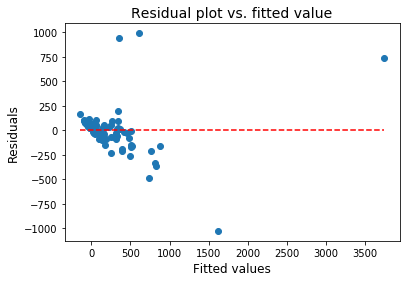

In [17]:
plt.scatter(results.fittedvalues,results.resid)
plt.plot([results.fittedvalues.min(),results.fittedvalues.max()],[0,0],'r--')
plt.title("Residual plot vs. fitted value",fontsize=14)
plt.xlabel("Fitted values",fontsize=12)
plt.ylabel("Residuals",fontsize=12)
plt.show()

And indeed, you may find that there is some increase in the residuals as the fitted value increases. 

According to the Jarque-Bera test, the normality of the errors can be also rejected. We may also check for normality of the residual by creating the QQ normal probability plot for the absolute residuals, respective for the studentized residuals.

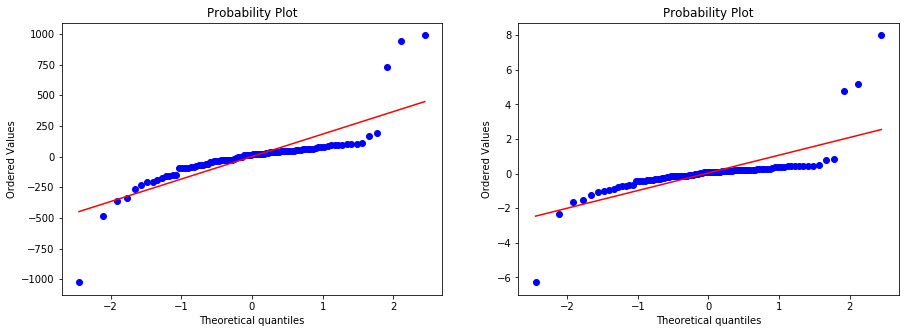

In [18]:
from scipy import stats
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
stats.probplot(results.resid, plot=ax[0])
stats.probplot(results.get_influence().resid_studentized_external, plot=ax[1])
plt.show()

Looking at these normal probability plots, you may also suspect the presence of outliers.

In Lab exercise 3.4, we discussed different leave-one-out outlier diagnostic methods. Using the knowledge acquired before, let's summarize the findings of outlier diagnostics by creating a function that will return a pandas dataframe (table) with a list of problematic data points. This function then can be reused later on, is required.

In [19]:
def OutlierDiagnostic(OLSresults,dataset,idx_start=0):
    from scipy import stats

    def outliertype(idx):
        outlier=[]
        if idx in idx_X:
            outlier.append('X')
        if idx in idx_R:
            outlier.append('R')
        if idx in idx_B:
            outlier.append('B')
        if idx in idx_F:
            outlier.append('F')
        if idx in idx_C:
            outlier.append('C')
        if idx in idx_D:
            outlier.append('D')
        return outlier
   
    D=int(OLSresults.df_model)
    N=int(OLSresults.nobs)
    h_=OLSresults.get_influence().hat_matrix_diag[:,np.newaxis]
    idx_X=np.nonzero(h_>=3*h_.mean())[0]
    rstud_=OLSresults.get_influence().resid_studentized_external
    idx_R=np.nonzero(np.abs(rstud_)>2.0)[0]
    dffits_,dffits_threshold=OLSresults.get_influence().dffits
    idx_F=np.nonzero(np.abs(dffits_)>dffits_threshold)[0]
    DFBETAS=OLSresults.get_influence().dfbetas
    dfbetas_threshold=2/np.sqrt(N)
    idx_B,idx_w=np.nonzero(np.abs(DFBETAS)>dfbetas_threshold)
    idx_C=np.nonzero(np.abs(OLSresults.get_influence().cov_ratio-1)>=3*(D+1)/N)[0]
    cook_,pval_=OLSresults.get_influence().cooks_distance
    cook_threshold=stats.f.sf(0.5,D+1,N-D-1)
    idx_D=np.nonzero(cook_>cook_threshold)[0]

    columnlst=['Index','Y']
    columnlst.extend(OLSresults.params.keys()[1:])
    columnlst.extend(["Cook's dist.",'Type','Note'])
    df=pd.DataFrame(columns=columnlst)
    idx=np.sort(np.append(idx_X,idx_R))
    idx=np.sort(np.append(idx,idx_B))
    idx=np.sort(np.append(idx,idx_F))
    idx=np.sort(np.append(idx,idx_C))
    idx=np.sort(np.append(idx,idx_D))
    dx=np.unique(idx)
    for i in idx:
        rowlst=[i+idx_start,dataset.iloc[i][columnlst[1]]]
        rowlst.extend([dataset.iloc[i][columnlst[col+2]] for col in range(D)])
        rowlst.extend([cook_[i],outliertype(i),['w_'+str(idx_w[i]) for i in list(np.ravel(np.nonzero(i==idx_B)))]])
        df.loc[i]=rowlst
    df['Index']=df['Index'].astype(int)
    return df

# Calling our outlier diagnostic function
OutlierDiagnostic(results,data)

,Index,Y,Xb,Xg,Xl,Cook's dist.,Type,Note
0,0,17.50,3.50,26,1.0,0.011452,[B],[w_0]
23,23,1300.00,65.00,270,1.0,0.167638,"[R, B, F, C]","[w_0, w_1, w_2]"
38,38,0.72,0.05,23,7.3,0.000192,[C],[]
39,39,2.38,0.34,21,8.0,0.000898,"[X, C]",[]
51,51,1600.00,160.00,360,1.0,0.451797,"[R, B, F, C]","[w_0, w_1, w_2, w_3]"
71,71,4480.00,2800.00,655,1.0,24.296782,"[X, R, B, F, C, D]","[w_0, w_1, w_3]"
74,74,250.00,230.00,390,1.0,0.134116,"[R, B, F]","[w_0, w_1, w_2, w_3]"
76,76,180.00,190.00,115,8.0,0.054787,"[X, B, F, C]","[w_0, w_2, w_3]"
77,77,590.00,1400.00,240,1.0,2.338573,"[X, R, B, F, C, D]","[w_0, w_1, w_2, w_3]"
79,79,225.00,93.00,330,1.0,0.026427,[B],[w_2]


Several observations are marked as problematic by different leave-one-out outlier diagnostic methods. What is really surprising that there are two observations with very high Cook's distance, both well above 1.

Let's create the squared studentized residuals versus leverages plot together with the contour plot of Cook's distances. Based on the knowledge already acquired in Ex. 3.3 let's create a function, which can be reused in later lab exercises.

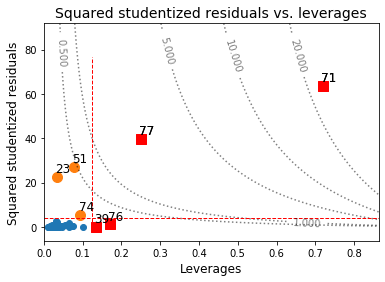

In [20]:
def SquaredStudResidLeveragePlot(OLSresults,CookLevels=None,textdx=0,textdy=0,xyscale=1.2):
    N=int(OLSresults.nobs)
    D=int(OLSresults.df_model)
    h_=OLSresults.get_influence().hat_matrix_diag[:,np.newaxis]
    idx_X=np.nonzero(h_>=3*h_.mean())[0]
    rstud_=OLSresults.get_influence().resid_studentized_external
    idx_R=np.nonzero(np.abs(rstud_)>2.0)[0]
    plt.scatter(h_,rstud_**2)
    plt.scatter(h_[idx_R],rstud_[idx_R]**2,s=100)
    for i in idx_R:
        plt.annotate(i, (float(h_[i]),float(rstud_[i]**2)),(float(h_[i])+textdx,float(rstud_[i]**2)+textdy),fontsize=12)
    plt.scatter(h_[idx_X],rstud_[idx_X]**2,s=100,c='r',marker='s')
    for i in idx_X:
        plt.annotate(i, (float(h_[i]),float(rstud_[i]**2)),(float(h_[i])+textdx,float(rstud_[i]**2)+textdy),fontsize=12)
    plt.plot([3*h_.mean(),3*h_.mean()],[0,xyscale*(rstud_.max())**2],'r--',lw=1)
    plt.plot([0,xyscale*h_.max()],[4,4],'r--',lw=1)
    plt.xlabel('Leverages',fontsize=12)
    plt.ylabel('Squared studentized residuals',fontsize=12)
    plt.title("Squared studentized residuals vs. leverages",fontsize=14)

    if CookLevels!=None:
        # Adding contour plot of the Cook's distances
        x = np.linspace(0, xyscale*h_.max(), 100)
        y = np.linspace(0, (xyscale*rstud_.max())**2, 100)
        X, Y = np.meshgrid(x, y)
        Z = (N-D-1)/(Y+N-D-2)*Y/(D+1)*X/(1-X)
        CS=plt.contour(X, Y, Z, colors='black',levels=CookLevels,linestyles="dotted",alpha=0.5)
        plt.clabel(CS)
        plt.show()
               
# Calling the r_stud**2 x leverage plot function
SquaredStudResidLeveragePlot(results,CookLevels=[0.5,1.0,5.0,10.0,20.0],textdx=-0.005,textdy=2)

From the above graph, it is obvious that observation 77, and especially observation 71 should be an influential point because they have both high leverage and studentized residual. Moreover, Cook's distance for both these observations is well beyond the threshold of 1.

So, let's fit another multiple linear regression model on the reduced dataset by removing observations 71 and 77.

In [21]:
resultsReduced = ols(formula = 'Y ~ Xb + Xg + Xl', data=data.drop(index=[71,77])).fit()
print(resultsReduced.summary(title='OLS Results for "Mammal species" reduced dataset'))
test = sms.het_goldfeldquandt(resultsReduced.resid, resultsReduced.model.exog)
print("\nGoldfeld-Quandt test:\n",lzip(name, test))
print("RMSE =",np.sqrt(resultsReduced.mse_resid))

               OLS Results for "Mammal species" reduced dataset               
Dep. Variable:                      Y   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.529
Method:                 Least Squares   F-statistic:                     35.80
Date:                Sun, 26 Apr 2020   Prob (F-statistic):           2.54e-15
Time:                        21:38:45   Log-Likelihood:                -615.64
No. Observations:                  94   AIC:                             1239.
Df Residuals:                      90   BIC:                             1249.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -138.8112     66.771     -2.079      0.0

Although the RMSE decreased from 224.56 grams to 172.8 grams, that shall be considered as still high. When predicting the mean of brain weight for the mammal based on the body weight, the gestation period, and the litter size, we still make an error of 172.8 grams, on average. 

Moreover, the R-squared value also decreased substantially: from 0.8 to 0.53. Thus, by removing two observations out of the  96, we ended up in a model that explains only 53% of the variation in brain weight.

According to the Goldfeld-Quandt test, we may still have heteroskedasticity issues, so let's create another residual plot.

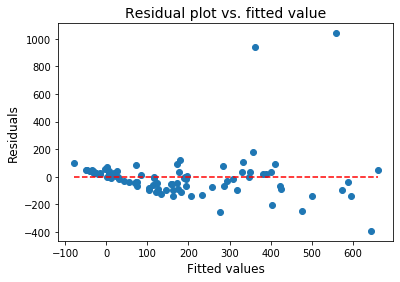

In [22]:
plt.scatter(resultsReduced.fittedvalues,resultsReduced.resid)
plt.plot([resultsReduced.fittedvalues.min(),resultsReduced.fittedvalues.max()],[0,0],'r--')
plt.title("Residual plot vs. fitted value",fontsize=14)
plt.xlabel("Fitted values",fontsize=12)
plt.ylabel("Residuals",fontsize=12)
plt.show()

Accordint to the Jarque-Bera test we still have non-normal errors. Let's have again the QQ normal probability plot of the absolute and studentized residuals.

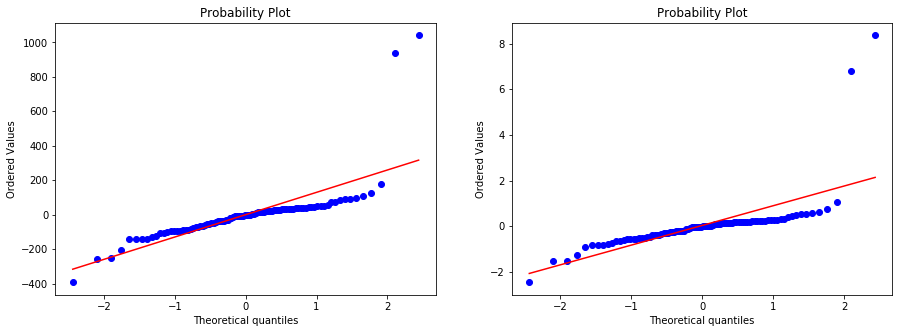

In [23]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
stats.probplot(resultsReduced.resid, plot=ax[0])
stats.probplot(resultsReduced.get_influence().resid_studentized_external, plot=ax[1])
plt.show()

According to the normal probability plot, outliers may still be present even for the reduced dataset. Because the p-value shows that the coefficient of *Xl* is not significantly different from zero, we may try to refit the linear regression model using only two predictors.

In [24]:
resultsReduced2 = ols(formula = 'Y ~ Xb + Xg', data=data.drop(index=[71,77])).fit()
print(resultsReduced2.summary(title='OLS Results for "Mammal species" reduced dataset with only two predictors'))
test = sms.het_goldfeldquandt(resultsReduced2.resid, resultsReduced2.model.exog)
print("\nGoldfeld-Quandt test:\n",lzip(name, test))
print("RMSE =",np.sqrt(resultsReduced2.mse_resid))

  OLS Results for "Mammal species" reduced dataset with only two predictors   
Dep. Variable:                      Y   R-squared:                       0.539
Model:                            OLS   Adj. R-squared:                  0.529
Method:                 Least Squares   F-statistic:                     53.19
Date:                Sun, 26 Apr 2020   Prob (F-statistic):           5.01e-16
Time:                        21:38:46   Log-Likelihood:                -616.16
No. Observations:                  94   AIC:                             1238.
Df Residuals:                      91   BIC:                             1246.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -80.8845     33.507     -2.414      0.0

RMSE and adjusted R-squared value did not change at all. The Jarque-Bera test still shows non-normal error and Goldfeld-Quandt test heteroscedasticity of the error.

**The overall conclusion is that the multiple linear regression seems to be a dead end.**

#### Fitting regression model after log transformation

So let's create a log transformation for both predictors and response variables. After logarithmic transformation, let's create again a scatter plot matrix.

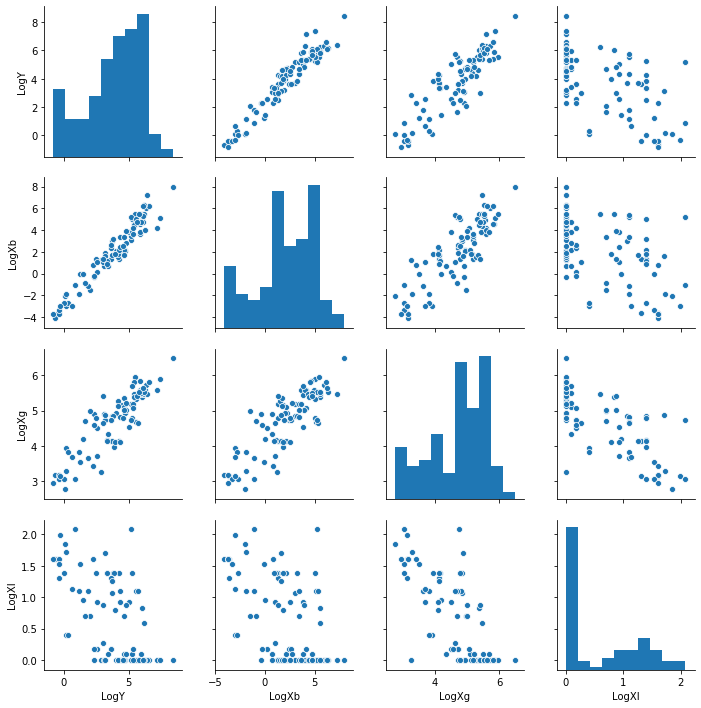

In [25]:
dataLog=data.drop(columns='Xs').apply(np.log,axis=0)
dataLog.columns=['LogY', 'LogXb', 'LogXg', 'LogXl']
sns.pairplot(dataLog)
plt.show()

Examining the above scatter plots, the first thing to notice that the outlier data points disappeared. Comparing the diagonal histograms with the original ones, we may also realize that the original data is mostly skewed to the left, while the transformed one is more centered. But we may also observe that the correlation between *Xb* and *Xg* is quite high.

Let's check the variance inflation factors.

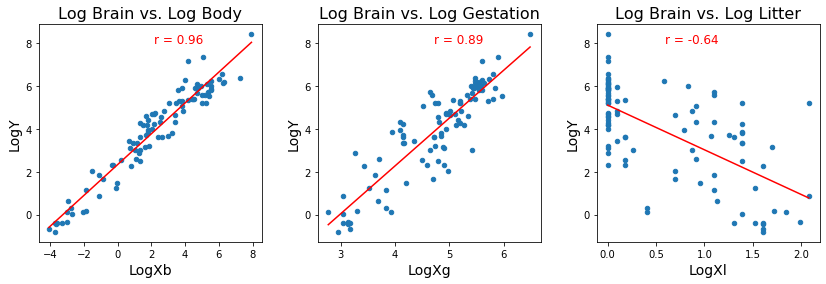

In [26]:
X=np.array(dataLog[["LogXb","LogXg","LogXl"]])
N,D=X.shape
Xdot=(np.insert(X,0,np.ones(N),axis=1))
y_=np.array(dataLog['LogY'])[:,np.newaxis]
fig, ax = plt.subplots(1, 3, figsize=(14, 4))
plt.subplots_adjust(wspace = 0.25)
xvarlist=['Log Body','Log Gestation','Log Litter']
linregr=LinearRegression()
for i in range(D):
    ax[i].scatter(X[:,i],y_,s=20)
    x_=X[:,i].reshape(-1,1)
    linregr.fit(x_,y_)
    ax[i].plot([x_.min(),x_.max()],linregr.predict(np.array([[x_.min()],[x_.max()]])),c='r')
    ax[i].set_xlabel(list(dataLog.columns.values)[i+1],fontsize=14)
    ax[i].set_ylabel(list(dataLog.columns.values)[0],fontsize=14)
    ax[i].set_title('Log Brain vs. '+xvarlist[i],fontsize=16)
    ax[i].annotate('r = '+'%.2f'%np.corrcoef(np.append(X,y_,axis=1), rowvar=False)[:,-1][i],\
                   xy=(X.mean(axis=0)[i],8),color='red',fontsize=12)
plt.show()

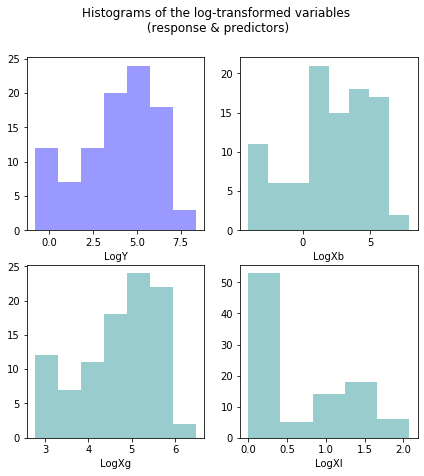

In [27]:
fig, axes = plt.subplots(2, 2, figsize=(7, 7))
sns.distplot(dataLog["LogY"] , color="blue", ax=axes[0, 0],kde=False)
sns.distplot(dataLog["LogXb"] , color="teal", ax=axes[0, 1],kde=False)
sns.distplot(dataLog["LogXg"] , color="teal", ax=axes[1, 0],kde=False)
sns.distplot(dataLog["LogXl"] , color="teal", ax=axes[1, 1],kde=False)
fig.suptitle("Histograms of the log-transformed variables\n (response & predictors)")
ax[0].set_xlabel('Log Y')
plt.show()

In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X=np.array(dataLog[["LogXb","LogXg","LogXl"]])
N,D=X.shape
Xdot=(np.insert(X,0,np.ones(N),axis=1))

print("VIF for Xb =",variance_inflation_factor(Xdot,1))
print("VIF for Xg =",variance_inflation_factor(Xdot,2))
print("VIF for Xl =",variance_inflation_factor(Xdot,3))

VIF for Xb = 3.7931664690215254
VIF for Xg = 6.268054793517796
VIF for Xl = 2.5448075599598283


The VIF values are increased for all three predictors. Although none of them exceeds the threshold of 10, for Xg this is over 5, so some collinearity issues might be present.

Let's check the Pearson correlation coefficients.

In [29]:
dataLog[["LogY","LogXb","LogXg","LogXl"]].corr()

,LogY,LogXb,LogXg,LogXl
LogY,1.000000,0.964291,0.891294,-0.642976
LogXb,0.964291,1.000000,0.845532,-0.545743
LogXg,0.891294,0.845532,1.000000,-0.758340
LogXl,-0.642976,-0.545743,-0.758340,1.000000


The Pearson correlation coefficients are also increased not only between the response variable and predictors but also between independent variables.

Let's fit a multiple linear regression model on the log-transformed dataset.

In [30]:
resultsLog = ols(formula = 'LogY ~ LogXb + LogXg + LogXl', data=dataLog).fit()
print(resultsLog.summary(title='OLS Results for log-transformed "Mammal species" dataset'))
test = sms.het_goldfeldquandt(resultsLog.resid, resultsLog.model.exog)
print("\nGoldfeld-Quandt test:\n",lzip(name, test))
print("RMSE =",np.sqrt(resultsLog.mse_resid))

           OLS Results for log-transformed "Mammal species" dataset           
Dep. Variable:                   LogY   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     631.6
Date:                Sun, 26 Apr 2020   Prob (F-statistic):           3.14e-61
Time:                        21:38:51   Log-Likelihood:                -62.659
No. Observations:                  96   AIC:                             133.3
Df Residuals:                      92   BIC:                             143.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8548      0.662      1.292      0.2

The first thing to notice, that there is a huge drop in the RMSE. It dropped from 224.56, obtained with the original dataset, to 0.47. Thus, when predicting the mean of brain weight for the mammal, based on the body weight, the gestation period, and the litter size, we are making only an error of 0.47 grams, on average. The adjusted R-square value also improved significantly, now is 0.95.

Moreover, according to the Goldfeld-Quandt test, the null hypothesis of homoskedasticity shall not be rejected.

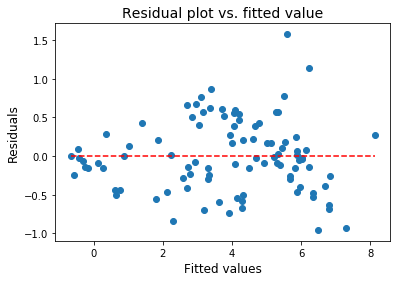

In [31]:
plt.scatter(resultsLog.fittedvalues,resultsLog.resid)
plt.plot([resultsLog.fittedvalues.min(),resultsLog.fittedvalues.max()],[0,0],'r--')
plt.title("Residual plot vs. fitted value",fontsize=14)
plt.xlabel("Fitted values",fontsize=12)
plt.ylabel("Residuals",fontsize=12)
plt.show()

According to the Jarque-Bera the errors now follow somehow the normal distribution. We may create the normal probability plot for absolute and studentized residuals to check this.

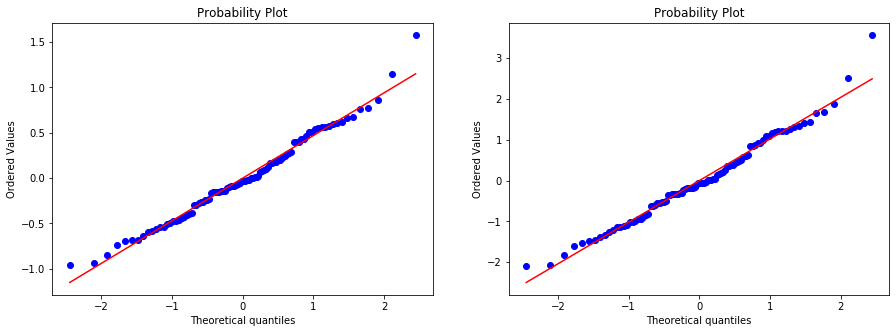

In [32]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
stats.probplot(resultsLog.resid, plot=ax[0])
stats.probplot(resultsLog.get_influence().resid_studentized_external, plot=ax[1])
plt.show()

And indeed, the residuals now follow roughly the normal distribution.

You may run the leave-one-out outlier diagnostics to see if there outliers.

In [33]:
#OutlierDiagnostic(resultsLog,dataLog)

None of the listed problematic data points have both high leverage and high studentized residuals, and none of them has high Cook's distance.

Let's make the squared studentized residuals versus leverages plot, including the contour plot of Cook's distances, to check this remark also visually.

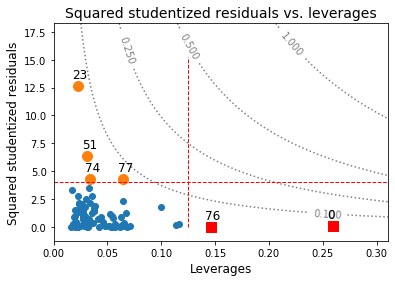

In [34]:
SquaredStudResidLeveragePlot(resultsLog,CookLevels=[0.1,0.25,0.5,1.0],textdx=-0.005,textdy=0.7)

As can be seen in the above figure, none of the observations has, at the same time, both high leverage and high studentized residual. Moreover, all observations have Cook's distances well below 0.1. Thus, we can conclude that no influential points are present in the dataset.

What we may find in the OLS results of the log-transformed dataset, that the intercept is not significantly different from zero, so we might refit the regression model without an intercept.

In [35]:
resultsLogNoIntercept = ols(formula = 'LogY ~ LogXb + LogXg + LogXl -1', data=dataLog).fit()
print(resultsLogNoIntercept.summary(title='OLS Results for log transformed dataset without intercept'))
test = sms.het_goldfeldquandt(resultsLogNoIntercept.resid, resultsLogNoIntercept.model.exog)
print("\nGoldfeld-Quandt test:\n",lzip(name, test))
print("RMSE =",np.sqrt(resultsLogNoIntercept.mse_resid))

               OLS Results for log transformed dataset without intercept               
Dep. Variable:                   LogY   R-squared (uncentered):                   0.989
Model:                            OLS   Adj. R-squared (uncentered):              0.988
Method:                 Least Squares   F-statistic:                              2732.
Date:                Sun, 26 Apr 2020   Prob (F-statistic):                    1.63e-90
Time:                        21:38:52   Log-Likelihood:                         -63.522
No. Observations:                  96   AIC:                                      133.0
Df Residuals:                      93   BIC:                                      140.7
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

The RMSE did not change, while the adjusted R-squared value further improved to 0.99, which is a remarkable result.

**We can conclude, that while the multiple regression model failed on the original dataset, it performed very well on the log-transformed dataset.**

## 2. Varinace stabilizing transformations <a name="VarStabTransf"></a>

sdfsdf

## 3. Power transformations <a name="PowerTransf"></a>

sdfsdf

## 4. Normalizing the data <a name="DataNormalization"></a>

After normalizing the data each observation will have unit norm (other norms are also possible).
Let's calculate the Eucledian norm of each observation for a random distribution filling a cube. 

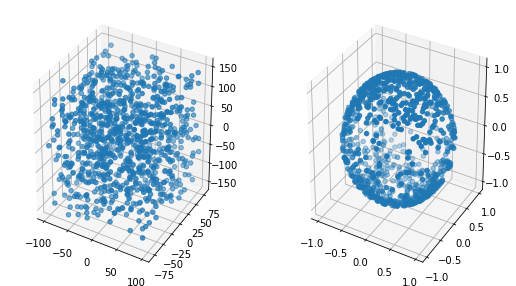

In [36]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import Normalizer

df = pd.DataFrame({
    'x1': np.random.randint(-100, 100, 1000).astype(float),
    'y1': np.random.randint(-80, 80, 1000).astype(float),
    'z1': np.random.randint(-150, 150, 1000).astype(float),
})

scaler = Normalizer()
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns=df.columns)

fig = plt.figure(figsize=(9, 5))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')
ax1.scatter(df['x1'], df['y1'], df['z1'])
ax2.scatter(scaled_df['x1'], scaled_df['y1'], scaled_df['z1'])
plt.show()

As can be seen after normalization all the data points lie on the surface of the sphere.

<img src = "images/AML1-Cover.png" width = 90, align = "left" style="margin:0px 20px">

**Note:** This Jupyter Notebook is accompanying the book: <br><i>"Machine Learning - From Theory to Practice with NumPy and scikit-learn, Volume 1: Generalized Linear Models"</i><br>
by Ferenc Farkas, Ph.D. 

If you find this Notebook useful, please support me by buying the book at [Leanpub](http://leanpub.com/AML1). <br>
Copyright notice: This Jupyter Notebook is made available under the [MIT License](https://opensource.org/licenses/MIT).